<a href="https://colab.research.google.com/github/maciejkpl/temp/blob/master/tree_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://pypi.python.org/pypi/pydot
# !apt-get -qq install -y graphviz && pip install -q pydot
# import pydot

In [0]:
import numpy as np
import pandas as pd

import sklearn
import os
import io

from pandas import DataFrame as df

# !wget http://media.sundog-soft.com/Udemy/DataScience.zip
# !unzip DataScience.zip
folder = 'DataScience-Python3'
# os.listdir(folder)

In [33]:
input_file = os.path.join(folder, 'PastHires.csv')
df = pd.read_csv(input_file)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [34]:
dict_for_mapping = {'Y': 1, 'N': 0}
columns_to_map = ['Employed?', 'Top-tier school', 'Interned', 'Hired']
for col in columns_to_map:
    df[col] = df[col].map(dict_for_mapping)

d2_for_mapping = {'BS':1,'MS':2,'PhD':3}
df['Level of Education'] = df['Level of Education'].map(d2_for_mapping)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,1,0,0,1
1,0,0,0,1,1,1,1
2,7,0,6,1,0,0,0
3,2,1,1,2,1,0,1
4,20,0,2,3,1,0,0


In [0]:
from sklearn import tree

X = df.drop(columns='Hired')
y = df['Hired']
columns = list(X.columns)

In [36]:
X = X.to_numpy()
X = X.astype('float32')
print(X.dtype)
y = y.to_numpy()
y = y.astype('float32')
print(y.dtype)

float32
float32


In [37]:
model = tree.DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# !pip install --pre -f https://sklearn-nightly.scdn8.secure.raxcdn.com scikit-learn==0.22dev0

In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.tree import plot_tree

text = export_text(
    decision_tree=model,
    feature_names=columns,
)
print(text)

|--- Employed? <= 0.50
|   |--- Interned <= 0.50
|   |   |--- Years Experience <= 0.50
|   |   |   |--- Top-tier school <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- Top-tier school >  0.50
|   |   |   |   |--- class: 1.0
|   |   |--- Years Experience >  0.50
|   |   |   |--- class: 0.0
|   |--- Interned >  0.50
|   |   |--- class: 1.0
|--- Employed? >  0.50
|   |--- class: 1.0



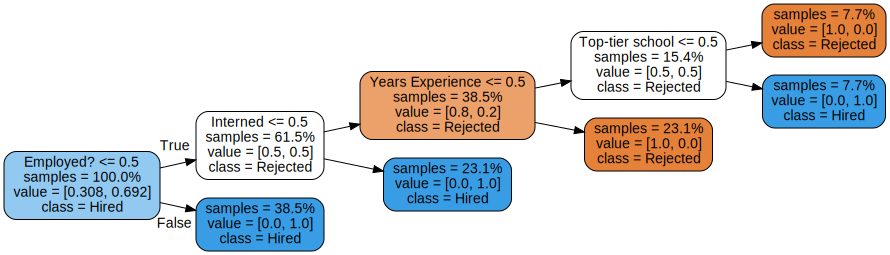

In [54]:
import graphviz 

dot_data = tree.export_graphviz(decision_tree=model, 
                                feature_names=columns, 
                                class_names=['Rejected','Hired'], 
                                filled=True, 
                                impurity=False, 
                                proportion=True, 
                                rotate=True, 
                                rounded=True, 
                                precision=3)

graph = graphviz.Source(dot_data) 
graph 